In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Ingestion:

In [2]:
df = pd.read_csv("weather_data.csv")
df.head()

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.0,10.0,Sunny
1,01/02/2023,New York,NaN,65.0,12.0,Cloudy
2,03-01-2023,New York,7.0,NaN,8.0,Rainy
3,NaN,London,8.0,70.0,15.0,Unknown
4,2023-01-02,London,6.0,75.0,20.0,Snowy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 80 non-null     object 
 1   city                 100 non-null    object 
 2   temperature_celsius  42 non-null     float64
 3   humidity_percent     47 non-null     float64
 4   wind_speed_kph       55 non-null     float64
 5   weather_condition    84 non-null     object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


# 2. Data Cleaning and Transformation:

In [4]:
# Replacing the nan by the mean of temperature, humidity and wind speed for that city
cols = ['temperature_celsius', 'humidity_percent','wind_speed_kph']
for col in cols:
    df[col] = df[col].fillna(df.groupby('city')[col].transform('mean'))

In [5]:
# drop the nan date
df = df.dropna(subset=['date'])

Standardizing Dates

In [6]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

Add a New Column: Create a temperature_fahrenheit column by converting temperature_celsius using the formula: F=C×9/5+32

In [7]:
df["temperature_fahrenheit"] = (df["temperature_celsius"]*9/5)+32

Filter Data: Keep only rows where weather_condition is not "Unknown" or null.

In [8]:
df_filtered = df[(df['weather_condition'].notna()) & (df['weather_condition'] != 'Unknown')]

# 3. Data Output

In [9]:
df_filtered.to_csv("outputs/tranformed_weather_data.csv")

Generate a simple text report (e.g., Markdown or TXT file) listing the top 5 cities with the highest average temperature_celsius

In [10]:
df_filtered.groupby("city")["temperature_celsius"].mean()

city
London      9.888393
New York    7.874303
Tokyo       6.585882
Name: temperature_celsius, dtype: float64

In [11]:
avg_temp_by_city = df_filtered.groupby("city")["temperature_celsius"].mean().sort_values(ascending=False).head(5)

report_path = "outputs/top_5_hottest_cities.md"
with open(report_path, "w") as report_file:
    report_file.write("# Top 5 Hottest Cities by Average Temperature (°C)\n\n")
    for city, temp in avg_temp_by_city.items():
        report_file.write(f"- **{city}**: {temp:.2f} °C\n")

# b. Bonus (Optional)

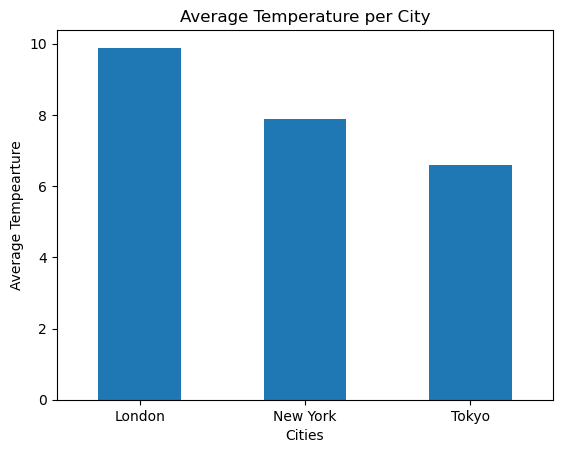

In [12]:
df_filtered.groupby("city")["temperature_celsius"].mean().plot(kind ="bar")
plt.title("Average Temperature per City")
plt.xlabel("Cities")
plt.xticks(rotation=0)
plt.ylabel("Average Tempearture")
plt.savefig("outputs/avg_temp_bar_chart.png")
plt.show()